# Motor voltage → speed model (2022)

This notebook shows how to load and use the `motor_v = batt_v * esc_dt` speed model from `model.py`.


In [1]:
from pathlib import Path
import sys

# Make sure this folder is importable (useful when importing from other notebooks).
HULL_DIR = Path.cwd()
if str(HULL_DIR) not in sys.path:
    sys.path.insert(0, str(HULL_DIR))

import model as hull_model

speed_map = hull_model.get_2022_motor_voltage_speed_map()
print("power model k,a,v0:", speed_map.k, speed_map.a, speed_map.v0)
print("motor_v domain [V]:", speed_map.motor_v_min, "to", speed_map.motor_v_max)

power model k,a,v0: 2.460330019741143 0.6109103174709903 7.965297002554943
motor_v domain [V]: 0.0 to 36.290176


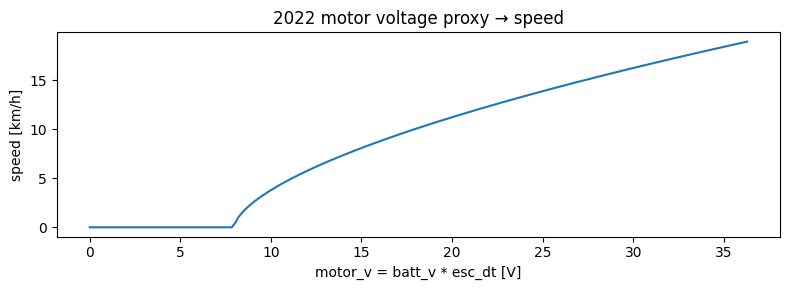

In [2]:
import numpy as np
import matplotlib.pyplot as plt

mv = np.linspace(speed_map.motor_v_min, speed_map.motor_v_max, 200)
v_kmh = speed_map.speed_kmh_from_motor_v(mv, clip=True)

plt.figure(figsize=(8, 3))
plt.plot(mv, v_kmh)
plt.xlabel("motor_v = batt_v * esc_dt [V]")
plt.ylabel("speed [km/h]")
plt.title("2022 motor voltage proxy → speed")
plt.tight_layout()
plt.show()

In [3]:
# Example: predict from duty-cycle and battery voltage
esc_dt = 0.40
batt_v = 37.0
motor_v = esc_dt * batt_v

speed_kmh = float(speed_map.speed_kmh_from_motor_v(motor_v, clip=False))
speed_mps = speed_kmh / 3.6

print("motor_v:", motor_v, "V")
print("speed:", speed_kmh, "km/h (", speed_mps, "m/s )")

motor_v: 14.8 V
speed: 7.960350862799764 km/h ( 2.2112085729999342 m/s )
